In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/Data Sets/placementAU.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [8]:
# OLS_regression:
X = df['cgpa']
y = df['package']
    
X_mean = np.mean(X)
y_mean = np.mean(y)

XY = X * y
X_sq = X ** 2

XY_mean = np.mean(XY)
X_sq_mean = np.mean(X_sq)

a1 = (XY_mean - X_mean * y_mean) / (X_sq_mean - X_mean ** 2)  
a0 = y_mean - a1 * X_mean 

print(a1,a0)

0.5695912947937483 -0.9856779462556973


In [9]:
def predict_y(row):
    y_predict = a0+a1*row['cgpa']
    return y_predict

In [10]:
df['y_predict'] = df.apply(predict_y,axis=1)
df

,cgpa,package,y_predict
0,6.89,3.26,2.938806
1,5.12,1.98,1.930629
2,7.82,3.25,3.468526
3,7.42,3.67,3.240689
4,6.94,3.57,2.967286
...,...,...,...
195,6.93,2.46,2.961590
196,5.89,2.57,2.369215
197,7.21,3.24,3.121075
198,7.63,3.96,3.360304


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate_regression:
# Predicted values
df['y_predict'] = a0 + a1 * df['cgpa']
    
# True values
y_true = df['package']
y_pred = df['y_predict']
    
# Accuracy metric
r2 = r2_score(y_true, y_pred)
    
print("R2 Score : ",r2)

R2 Score :  0.7756192256051151


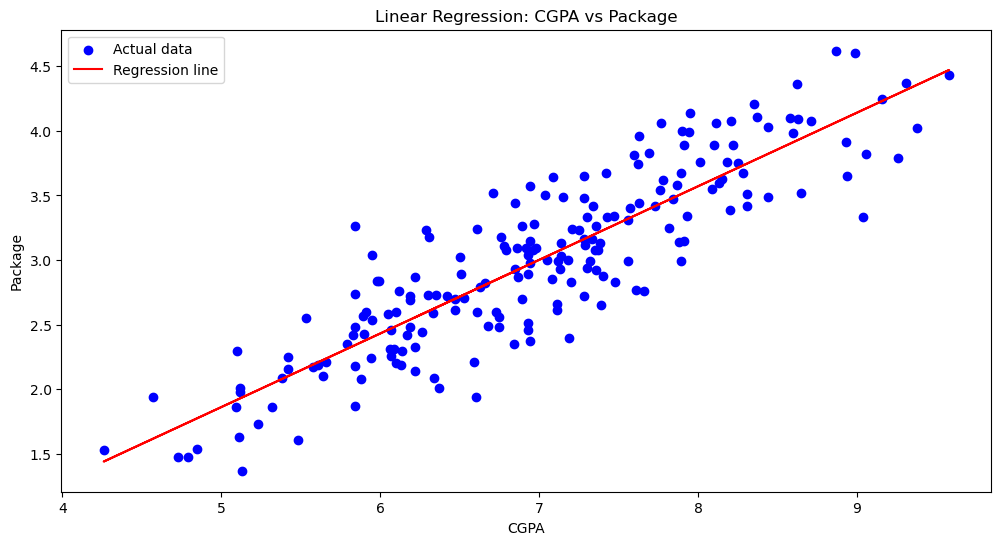

In [12]:
# Plot the results
plt.figure(figsize=(12,6))

# Scatter plot of actual data
plt.scatter(df['cgpa'], df['package'], color='blue', label='Actual data')

# Regression line
plt.plot(df['cgpa'], df['y_predict'], color='red', label='Regression line')

# Add labels, legend, and title
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Linear Regression: CGPA vs Package')
plt.legend()